In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time

### Numerical Comparasion of Network Design Algorithms for Reginalized Variables
El articulo trata de escoger un subconjunto de cuatro puntos, de tal manera que, la varianza estimada sea minima. 
Se realizaran los calculos para el siguinte conjunto de puntos (ejemplo 1).


In [2]:
xks= np.array([[60.6, 36.2], [60.9, 17.7]])
xts = np.array([[55.08,39.21],[69.75,21.85],[56.65,39.53],[63.12,39.02],
       [68.29,26.52],[65.21,32.47],[62.23,32.71],[72.79,24.92]])
xr = np.array([[57.5,22.5],[57.5,32.5],[72.5,22.5],[72.5,32.5]])

esquina_inferior =  np.array([57.5,22.5])
wr = 72.5-57.5
hr = 32.5-22.5


Se grafican los puntos y el bloque a estimar 

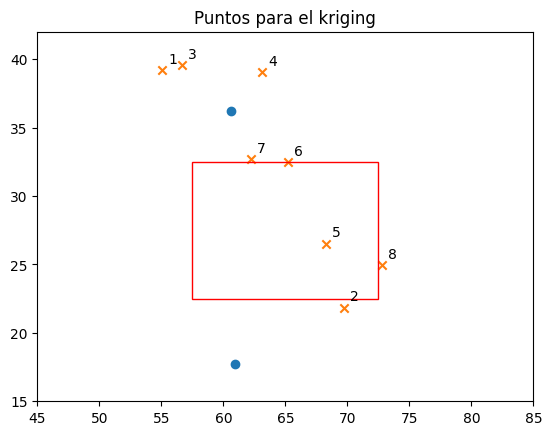

In [13]:
fig, ax = plt.subplots(1,1)

ax.scatter(xks[:,0],xks[:,1],marker="o")
ax.scatter(xts[:,0],xts[:,1],marker="x")


# Crear el rectángulo
rect = patches.Rectangle(esquina_inferior, wr, hr, linewidth=1, edgecolor='r', facecolor='none')

# Añadir el rectángulo al eje
ax.add_patch(rect)

for i in range(8):
    plt.annotate(f'{i+1}', xy=(xts[i]+0.5))


ax.set_xlim(45,85)
ax.set_ylim(15,42)

ax.set_title("Puntos para el kriging")
plt.show()

Los puntos azules son puntos ya muestrados y las cruces corresponden a posibles puntos, de estos se debe escoger los cuatro puntos que den la varianza mas pequeña en la estimación del bloque rojo. Para calcular la varianza se debe solucionar el sistema de ecuaciones para kriging que esta dado por:
$$
\sum_{j=1}^{n}\lambda_{j}\gamma_{ij}+\mu = \gamma_{vj}\quad\quad    (i=1,..n)
$$
$$
\sum_{j=1}^{n}\lambda_{j} =1
$$

con 

$$
\gamma_{ij} = \gamma(x_i-x_j)
$$

$$ 
\gamma_{vj} = \frac{1}{V}\int_{V}\gamma(x-x_j)dx = \frac{1}{m}\sum_{i}^m\gamma(x_i-x_j)\quad\quad xi\in V
$$

cuya solucion se llama $\lambda^{*}_{j}$ y $\mu^*$

Al solucionar este sistema se puede calcular la varianza estimada con la siguinte formula:

$$
Var{Z*}= \mu^*+\lambda^{*}_{j}\gamma_{vj}-\gamma_{VV}
$$

con 

$$
\gamma_{VV} = \frac{1}{V^2}\int_{V}\int_{V}\gamma(x-x')dxdx' = \frac{1}{m^2}\sum_{i}^m \sum_{j}^m\gamma(x_i-x_j)\quad\quad xi,xj\in V
$$


se inicia seleccionando todos los posibles conjuntos de seis puntos, dos dados y cuatro de los que se escogen de los 8 puntos existentes.

se forman todas la posibles combinaciones de cuatro elementos de los ocho puntos

In [15]:
import itertools

# Lista original
lista =  [1, 2, 3, 4, 5, 6, 7, 8]

# Generar todas las combinaciones de 4 elementos
subconjuntos_puntos = list(itertools.combinations(xts, 4))
subconjuntos_indices = list(itertools.combinations(lista, 4))
# unir cada combinacion con los dos elemntos conocidos puntos circulares 

combinaciones = []
for puntos, indices in zip(subconjuntos_puntos,subconjuntos_indices):
    combinacion = np.concatenate([xks, puntos],axis = 0)
    combinaciones.append([combinacion, indices])
combinaciones


[[array([[60.6 , 36.2 ],
         [60.9 , 17.7 ],
         [55.08, 39.21],
         [69.75, 21.85],
         [56.65, 39.53],
         [63.12, 39.02]]),
  (1, 2, 3, 4)],
 [array([[60.6 , 36.2 ],
         [60.9 , 17.7 ],
         [55.08, 39.21],
         [69.75, 21.85],
         [56.65, 39.53],
         [68.29, 26.52]]),
  (1, 2, 3, 5)],
 [array([[60.6 , 36.2 ],
         [60.9 , 17.7 ],
         [55.08, 39.21],
         [69.75, 21.85],
         [56.65, 39.53],
         [65.21, 32.47]]),
  (1, 2, 3, 6)],
 [array([[60.6 , 36.2 ],
         [60.9 , 17.7 ],
         [55.08, 39.21],
         [69.75, 21.85],
         [56.65, 39.53],
         [62.23, 32.71]]),
  (1, 2, 3, 7)],
 [array([[60.6 , 36.2 ],
         [60.9 , 17.7 ],
         [55.08, 39.21],
         [69.75, 21.85],
         [56.65, 39.53],
         [72.79, 24.92]]),
  (1, 2, 3, 8)],
 [array([[60.6 , 36.2 ],
         [60.9 , 17.7 ],
         [55.08, 39.21],
         [69.75, 21.85],
         [63.12, 39.02],
         [68.29, 26.52]]),
  (

se tienen todos los posibles subconjuntos de 6 elementos para calcular su varianza estimada.

El variograma utilizado es esferico y tiene la forma:
$$
\gamma(h)= \left\{ \begin{array}{lcc} 0 & si & h =0 \\ \\ 0.08+0.1[\frac{3}{2}\frac{h}{40}-\frac{1}{2}(\frac{h}{40})^3] & si & 0 < h < 40 \\ \\ 0.18 & si & h \geq 40 \end{array} \right.
$$

Donde $h$ es la distancia entre cada par de puntos. La funcion en python es 

In [16]:
def variograma(h):
    return np.where(h == 0,0,
             np.where((h > 0) & (h < 40), 0.08 + 0.1 * (3/2 * (h/40) - 1/2 * (h/40)**3),0.18))  

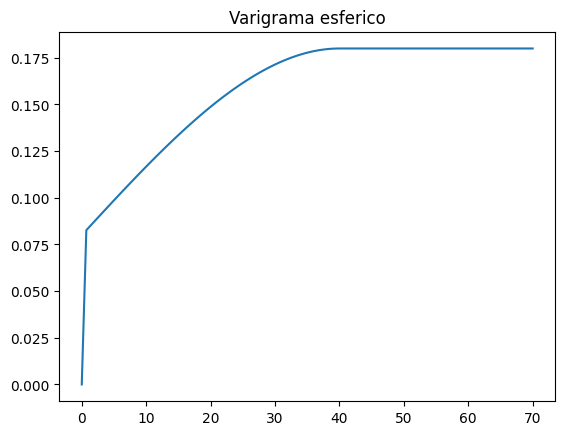

In [6]:
xl = np.linspace(0,70,100)
yl = variograma(xl)
plt.plot(xl,yl)
plt.title("Varigrama esferico")
plt.show()

Ya teniendo el variograma el sistema de ecuaciones de kriging puede ser escrito en forma matricial como 
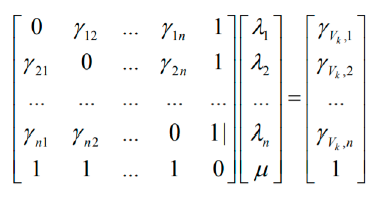


Se construye una funcion que dado un conjunto de punto obtenga la matriz de la izquierda.

In [17]:
def matriz_izquierda(puntos):
    l = len(puntos)
    mi = np.ones((l+1,l+1))
    for i in range(l):
        for j in range(l):
            distancia = np.linalg.norm(puntos[i]-puntos[j])
            mi[i,j] = variograma(distancia)
    mi[l,l] = 0
    return mi

Ahora una funcion que retorne el vector de la derecha del sistema de ecuaciones 

In [18]:
def vector_derecha(puntos, puntos_area):
    md = np.zeros((len(puntos),len(puntos_area)))
    for i,xi in enumerate(puntos):
        for j,xj in enumerate(puntos_area):
            md[i,j] = variograma(np.linalg.norm(xi-xj))
    vd = np.array(list(np.mean(md,axis=1))+[1])
    return vd

Ya teniendo una función que obtiene la matriz y el vector, se puede obtener los lambdas, al multiplicar la inversa de la matriz por el vector, entonces para obtener el valor de la varianza falta construir una funcion que calcule el termino 
$$
\gamma_{VV} = \frac{1}{V^2}\int_{V}\int_{V}\gamma(x-x')dxdx' = \frac{1}{m^2}\sum_{i}^m \sum_{j}^m\gamma(x_i-x_j)\quad\quad xi,xj\in V
$$

In [9]:
def gamma_VV(puntos_area):
    mvdd = np.zeros((len(puntos_area),len(puntos_area)))
    for i,xi in enumerate(puntos_area):
        for j,xj in enumerate(puntos_area):
            mvdd[i,j] = variograma(np.linalg.norm(xi-xj))
    vdd = mvdd.sum()/(len(puntos_area)**2)
    return vdd

Por ultimo, se construye una función que calcule la variaza: 

In [19]:
def varianza_estimada(puntos, puntos_area):
    matriz_a = matriz_izquierda(puntos)
    inversa_a = np.linalg.inv(matriz_a)
    v_derecha = vector_derecha(puntos, puntos_area)
    # calcula lambdas y mu 
    lambdas =  inversa_a@v_derecha
    g_VV = gamma_VV(puntos_area)
    
    varianza = (v_derecha[:-1]*lambdas[:-1]).sum()+lambdas[-1]-g_VV
    return varianza



Ya teniendo la funcion de la varianza estimada se corre sobre cada conjunto de puntos y escoge la minima con sus respectivos indices de los puntos xts.

In [11]:
menor_varianza = 100
indices = 0
inicio_tiempo = time.time()
for i in range(len(combinaciones)):
    v_esti = varianza_estimada(combinaciones[i][0],xr)
     
    if menor_varianza > v_esti:
       menor_varianza =  v_esti 
       indices = combinaciones[i][1]
final_tiempo = time.time()
tiempo_ejecucion = final_tiempo - inicio_tiempo

In [21]:
print(f"La menor varianza es:\n{menor_varianza}")
print(f"Los cuatro puntos son:\n{indices}")
print(f"El tiempo de ejecución del proceso fue de {tiempo_ejecucion} segundos.")

La menor varianza es:
0.04074219193601181
Los cuatro puntos son:
(5, 6, 7, 8)
El tiempo de ejecución del proceso fue de 0.09775352478027344 segundos.
